In [30]:
# load data.csv into pandas

import pandas as pd

data = pd.read_csv('data.csv', delimiter=';')
# convert target to numeric
# Dropout -> 0, Enrolled -> 1, Graduate -> 2
data['Target'] = data['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 2})

X = data.drop('Target', axis=1)
y = data['Target']

print(X.head())
print(y.shape)

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [31]:
# use PCA to reduce the dimensionality of the data
from sklearn.decomposition import PCA
# reduce the data to 10 dimensions
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)
print(X_pca.shape)


(4424, 10)


k=2, score=0.9519881667270784
k=3, score=0.6304916121954556
k=4, score=0.7082779014542577
k=5, score=0.6730011389156763
k=6, score=0.6699504090798216
k=7, score=0.5929767865051431
k=8, score=0.5762232589539892
k=9, score=0.5896263170147528
k=10, score=0.5322186840219539


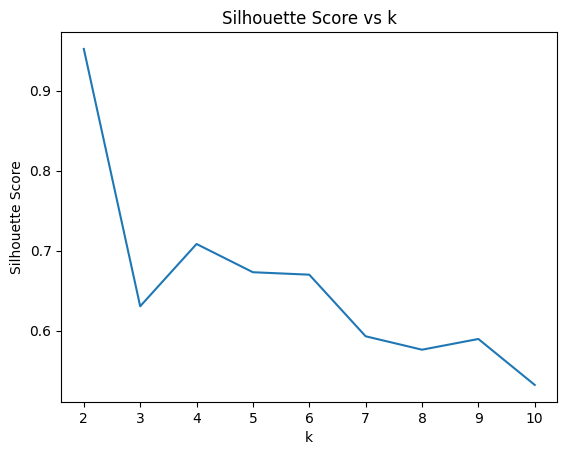

In [32]:
# search for the best k value for KMeans clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_)
    print(f'k={k}, score={score}')
    scores.append(score)

#plot the scores
import matplotlib.pyplot as plt
plt.plot(np.arange(2, 11), scores)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()


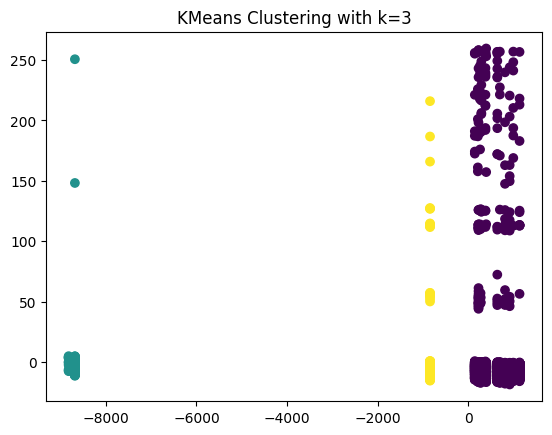

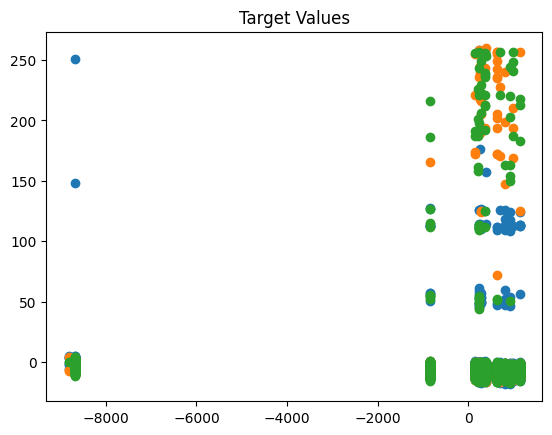

In [33]:
# draw the scatter plot of the data with k=3

pca = PCA(n_components=2)
X_scatter = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scatter)

plt.scatter(X_scatter[:, 0], X_scatter[:, 1], c=kmeans.labels_)
plt.title('KMeans Clustering with k=3')
plt.show()

# visualize y values with different colors based on cluster
for i in range(3):
    plt.scatter(X_scatter[y == i, 0], X_scatter[y == i, 1], label=i)
plt.title('Target Values')
plt.show()



k=2, score=0.9519881667270784
k=3, score=0.6304916121954556
k=4, score=0.7082779014542577
k=5, score=0.6664479510943159
k=6, score=0.6749753844632509
k=7, score=0.5915981679334804
k=8, score=0.5910483695725889
k=9, score=0.6066318975799843
k=10, score=0.5804517159673559


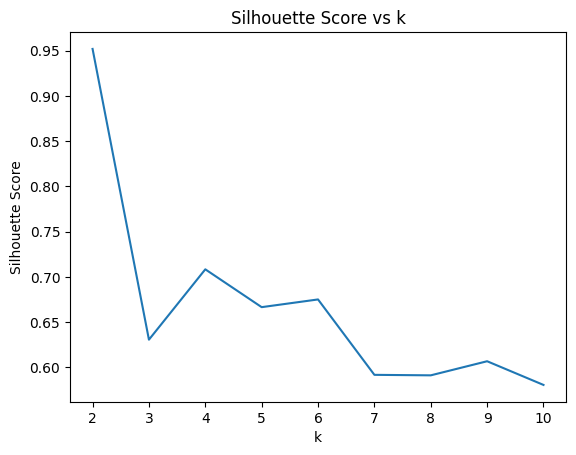

In [37]:
# use Hierarchical Clustering

from sklearn.cluster import AgglomerativeClustering

scores = []
for k in range(2, 11):
    agg = AgglomerativeClustering(n_clusters=k)
    agg.fit(X_pca)
    score = silhouette_score(X_pca, agg.labels_)
    print(f'k={k}, score={score}')
    scores.append(score)

#plot the scores
plt.plot(np.arange(2, 11), scores)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()

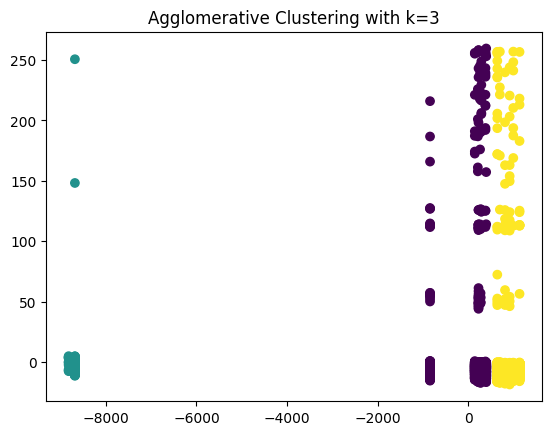

Text(0.5, 1.0, 'Target Values')

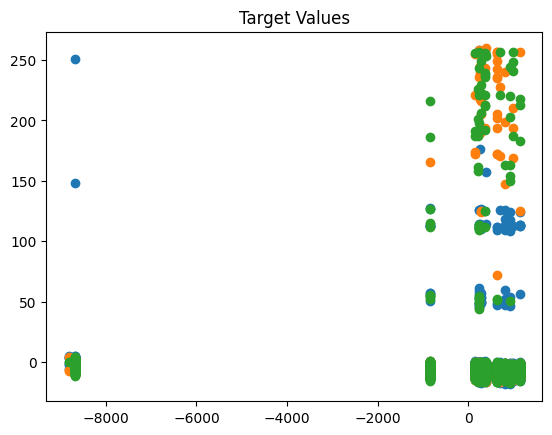

In [39]:
# draw the scatter plot of the data with k=3

agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X_scatter)

plt.scatter(X_scatter[:, 0], X_scatter[:, 1], c=agg.labels_)
plt.title('Agglomerative Clustering with k=3')
plt.show()

# visualize y values with different colors based on cluster

for i in range(3):
    plt.scatter(X_scatter[y == i, 0], X_scatter[y == i, 1], label=i)
plt.title('Target Values')


This shows that the target value can not be effectively seperated by clustering. Thus clustering is not an appropriate way to seperate the target value based on X values, at least not in a naive way.